In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 300)

In [5]:
BERT_test_results = pd.read_csv('/scratch/amh9750/capstone/nlp_bert/bert_test_results_16batch_5epoch_2e5lr_1wd.csv')
BERT_nontuned_results =  pd.read_csv('/scratch/amh9750/capstone/nlp_bert/bert_test_results_16batch_3epoch_2e5lr_01wd.csv')
BERT_pegasus_short_results = pd.read_csv('/scratch/amh9750/capstone/nlp_bert/100tok_pegasus_summaries_bert_test_results_16batch_3epoch_2e5lr_01wd.csv')
BERT_pegasus_long_results = pd.read_csv('/scratch/amh9750/capstone/nlp_bert/pegasus_200tok_summaries_bert_test_results_16batch_3epoch_2e5lr_01wd.csv')
BERT_T5_short_results = pd.read_csv('/scratch/amh9750/capstone/nlp_bert/100tok_t5_summaries_bert_test_results_16batch_3epoch_2e5lr_01wd.csv')
BERT_T5_long_results = pd.read_csv('/scratch/amh9750/capstone/nlp_bert/t5_summaries_bert_test_results_16batch_3epoch_2e5lr_01wd.csv')

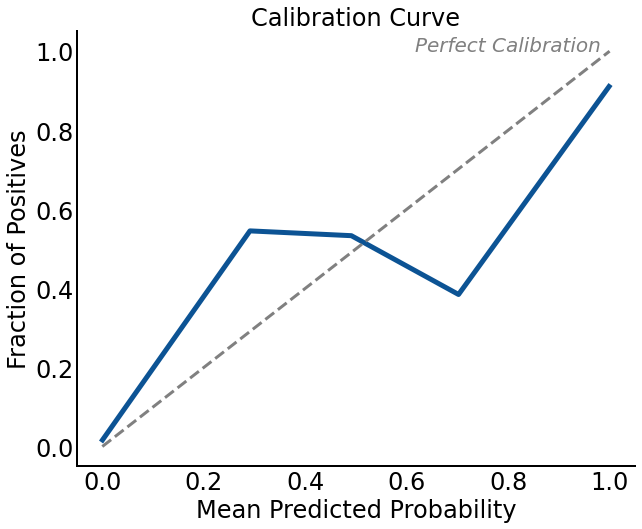

In [9]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Assuming BERT_test_results is a DataFrame or similar structure
predicted_probabilities = BERT_test_results['probability_class_1']
predicted_labels = BERT_test_results['predicted_label']
actual_labels = BERT_test_results['label']

# Calculate reliability values for class 1 (positive class)
prob_true_class1, prob_pred_class1 = calibration_curve(actual_labels, predicted_probabilities, n_bins=5, strategy='uniform', pos_label=1)

fig, ax = plt.subplots(figsize=(10, 8))

# Plot calibration curves for both classes
plt.plot(prob_pred_class1, prob_true_class1, color='#0c5394', lw=5)

# Plot the perfect calibration line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=3)

plt.text(0.8, 1, 'Perfect Calibration', color='gray', fontsize=20,  ha='center', style= 'italic' )

plt.xlabel('Mean Predicted Probability', fontsize=24)
plt.ylabel('Fraction of Positives', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.title('Calibration Curve', fontsize=24)


# Remove spines and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='both', length=0)

plt.show()


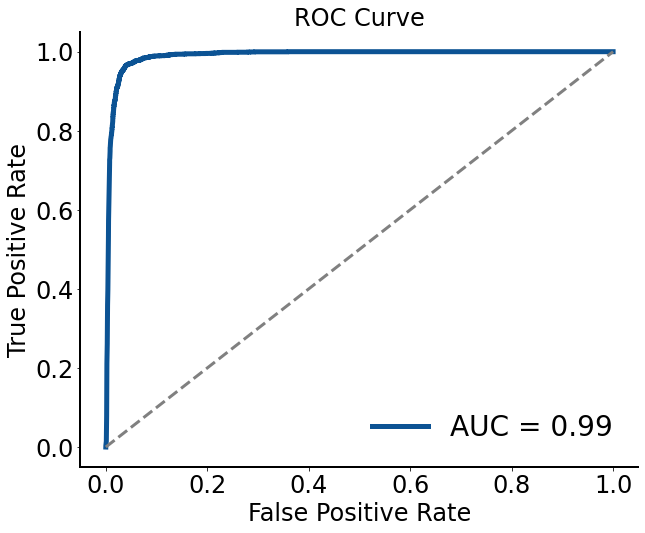

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

predicted_probabilities = BERT_test_results['probability_class_1']
actual_labels = BERT_test_results['label']

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)

# Compute AUC
auc = roc_auc_score(actual_labels, predicted_probabilities)

# Plot ROC curve
plt.figure(figsize=(10, 8))

plt.plot(fpr, tpr, color='#0c5394', lw=5, label=f'AUC = {auc:.2f}')  # Increase linewidth to 3
plt.plot([0, 1], [0, 1], color='gray', lw=3, linestyle='--')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate', fontsize=24)

# Remove legend box
plt.legend(loc='lower right', fontsize=28, frameon=False)
plt.title('ROC Curve', fontsize=24)

# Remove black box around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)  # Set linewidth of x-axis
plt.gca().spines['left'].set_linewidth(2)    # Set linewidth of y-axis

plt.show()


In [38]:

predicted_labels = BERT_test_results['predicted_label']
actual_labels = BERT_test_results['label']

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Compute precision, recall, and F1 score
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)
accuracy = accuracy_score(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Confusion Matrix:
[[9542  285]
 [ 172 2807]]

Precision: 0.9078266494178525
Recall: 0.942262504196039
F1 Score: 0.9247240981716357
Accuracy: 0.9643136029985944


In [7]:

predicted_labels = BERT_nontuned_results['predicted_label']
actual_labels = BERT_nontuned_results['label']

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Compute precision, recall, and F1 score
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)
accuracy = accuracy_score(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Confusion Matrix:
[[9524  303]
 [ 158 2821]]

Precision: 0.9030089628681178
Recall: 0.9469620678079893
F1 Score: 0.9244633786662297
Accuracy: 0.9640012494143371


In [39]:
predicted_labels = BERT_pegasus_short_results['predicted_label']
actual_labels = BERT_pegasus_short_results['label']

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Compute precision, recall, and F1 score
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)
accuracy = accuracy_score(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)



Confusion Matrix:
[[9474  353]
 [ 130 2849]]

Precision: 0.8897564022485946
Recall: 0.9563611950318899
F1 Score: 0.9218573046432617
Accuracy: 0.9622833047009215


In [40]:
predicted_labels = BERT_pegasus_long_results['predicted_label']
actual_labels = BERT_pegasus_long_results['label']

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Compute precision, recall, and F1 score
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)
accuracy = accuracy_score(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)



Confusion Matrix:
[[9347  480]
 [ 109 2870]]

Precision: 0.8567164179104477
Recall: 0.9634105404498153
F1 Score: 0.9069363248538473
Accuracy: 0.9540059347181009


In [42]:
predicted_labels = BERT_T5_short_results['predicted_label']
actual_labels = BERT_T5_short_results['label']

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Compute precision, recall, and F1 score
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)
accuracy = accuracy_score(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)



Confusion Matrix:
[[9294  533]
 [  75 2904]]

Precision: 0.8449228978760547
Recall: 0.9748237663645518
F1 Score: 0.9052369077306733
Accuracy: 0.9525222551928784


In [41]:
predicted_labels = BERT_T5_long_results['predicted_label']
actual_labels = BERT_T5_long_results['label']

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Compute precision, recall, and F1 score
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)
accuracy = accuracy_score(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)



Confusion Matrix:
[[9264  563]
 [  81 2898]]

Precision: 0.8373302513724357
Recall: 0.972809667673716
F1 Score: 0.9
Accuracy: 0.9497110729345619
